# K-평균을 이용한 붓꽃 데이터 세트 군집화

In [5]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [19]:
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['figure.titlesize'] = 30
plt.rcParams["font.family"] = "NanumGothic"


In [6]:
kmeans = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, random_state = 0 )
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [7]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [12]:
irisDF["target"] = iris.target
irisDF["cluster"] = kmeans.labels_
iris_result = irisDF.groupby(["target", "cluster"])["sepal_length"].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF["pca_x"] = pca_transformed[:,0]
irisDF["pca_y"] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


In [15]:
marker0_ind = irisDF[irisDF["cluster"] == 0].index
marker1_ind = irisDF[irisDF["cluster"] == 1].index
marker2_ind = irisDF[irisDF["cluster"] == 2].index

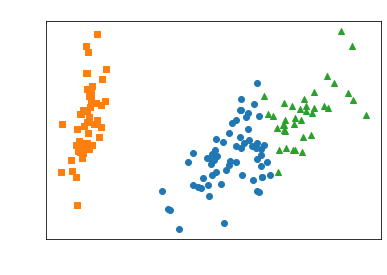

In [22]:
plt.scatter(x=irisDF.loc[marker0_ind, "pca_x"], y = irisDF.loc[marker0_ind, "pca_y"], marker ="o")
plt.scatter(x=irisDF.loc[marker1_ind, "pca_x"], y = irisDF.loc[marker1_ind, "pca_y"], marker ="s")
plt.scatter(x=irisDF.loc[marker2_ind, "pca_x"], y = irisDF.loc[marker2_ind, "pca_y"], marker ="^")

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("3 Clusters Visualiztion by 2 PCA Componets")
plt.show()

## 군집화 알고리즘 테스트를 위한 데이터 생성

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

# 총 200개의 레코드와 2개의 피처, 3개의 군집화, 표준편차 0.8
X,y = make_blobs(n_samples = 200, n_features = 2, centers = 3, cluster_std = 0.8, random_state = 0)
print(X.shape, y.shape)

# Y.target 값의 분포 확인

unique, counts = np.unique(y, return_counts = True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [27]:
import pandas as pd

clusterDF = pd.DataFrame(data = X, columns = ["ftr1", "ftr2"])
clusterDF["target"] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


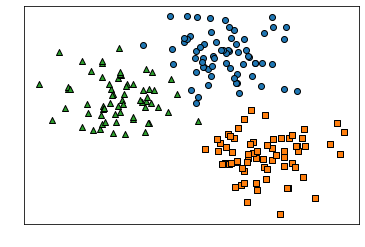

In [28]:
target_list = np.unique(y)

# 각 타깃별 산접도의 마커 값.
markers = ["o","s","^","P","D","H","x"]

# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0,1,2]

# target =0, target = 1, target =2 로 scatter plot을 marker별로 생성

for target in target_list:
    
    target_cluster = clusterDF[clusterDF["target"] == target]
    plt.scatter(x = target_cluster["ftr1"], y = target_cluster["ftr2"], edgecolor = "k", marker = markers[target])
plt.show()

In [29]:
X

array([[-1.69242695,  3.62202539],
       [ 0.69794036,  4.4288665 ],
       [ 1.10022802,  4.60631734],
       [-1.44872404,  3.38424521],
       [ 1.21486062,  5.36489604],
       [-0.90830163,  1.97077775],
       [ 2.47211942,  0.43703328],
       [ 1.65684156,  2.4412893 ],
       [ 1.07779975,  4.62537882],
       [-1.67942681,  2.60200265],
       [ 0.65372852,  5.28174338],
       [-0.97188549,  2.79022351],
       [ 1.58510026,  4.40112734],
       [ 1.29307545,  3.42933812],
       [ 0.25043139,  4.34534364],
       [-1.07307179,  2.73974218],
       [ 2.68432989,  0.52452838],
       [ 2.16883005,  0.64220093],
       [ 0.32575305,  2.92276125],
       [-3.15145159,  4.56947655],
       [-1.06408682,  3.19760583],
       [ 1.45946366,  0.23651283],
       [ 1.01287689,  4.15404025],
       [ 1.73407165,  4.17977925],
       [-3.3313554 ,  2.09987679],
       [-0.3148482 ,  4.1335951 ],
       [ 1.5403728 , -0.88105886],
       [-2.13821915,  1.76764908],
       [-0.84056487,

In [30]:
# Kmeans 객체를 이용해 X 데이터를 K-means 클러스터링 수행
kmeans = KMeans(n_clusters = 3, max_iter = 200, random_state = 0)
cluster_labels = kmeans.fit_predict(X)
clusterDF["kmeans_label"] = cluster_labels

In [31]:
cluster_labels

array([1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 1, 2, 2, 0, 1, 1, 2,
       0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0, 2, 2, 1, 2, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 2, 2, 1,
       2, 2, 1, 2, 2, 0, 0, 1, 0, 1, 2, 2, 2, 1, 1, 0, 0, 2, 2, 0, 0, 1,
       0, 2, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 1, 0, 1, 0, 2, 0, 1, 2,
       0, 1, 2, 1, 0, 0, 0, 2, 1, 1, 2, 2, 1, 0, 2, 0, 1, 2, 1, 0, 1, 2,
       2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 2, 2, 0, 1, 1, 2, 0, 2, 1, 1, 1,
       0, 2, 2, 2, 0, 0, 2, 1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 2, 0, 2, 1, 1,
       0, 1, 0, 2, 0, 1, 2, 2, 2, 0, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 2,
       0, 2])

In [32]:
clusterDF.head(3)

,ftr1,ftr2,target,kmeans_label
0,-1.692427,3.622025,2,1
1,0.697940,4.428867,0,0
2,1.100228,4.606317,0,0


In [34]:
# cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출

centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

In [35]:
centers

array([[ 0.990103  ,  4.44666506],
       [-1.70636483,  2.92759224],
       [ 1.95763312,  0.81041752]])

In [37]:
unique_labels

array([0, 1, 2])

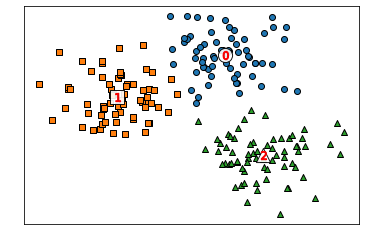

In [60]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']  = cluster_labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='r', marker='$%d$' % label)

plt.show()

In [63]:
print(clusterDF.groupby(["target"])["kmeans_label"].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


# 붓꽃 데이터 세트를 이용한 군집 평가

In [71]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(irisDF)

irisDF['cluster'] = kmeans.labels_

# iris 의 모든 개별 데이터에 실루엣 계수값을 구함. 
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)


# irisDF에 실루엣 계수 컬럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

irisDF.head(3)



silhouette_samples( ) return 값의 shape (150,)
붓꽃 데이터셋 Silhouette Analysis Score:0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


In [73]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

In [69]:
kmeans.labels_


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [70]:
score_samples

array([0.85295506, 0.81549476, 0.8293151 , 0.80501395, 0.8493016 ,
       0.74828037, 0.82165093, 0.85390505, 0.75215011, 0.825294  ,
       0.80310303, 0.83591262, 0.81056389, 0.74615046, 0.70259371,
       0.64377156, 0.77568391, 0.85101831, 0.70685782, 0.82030124,
       0.78418399, 0.82590584, 0.79297218, 0.7941134 , 0.77503635,
       0.79865509, 0.83346695, 0.84201773, 0.84364429, 0.81784646,
       0.81518962, 0.79899235, 0.76272528, 0.72224615, 0.82877171,
       0.83224831, 0.79415322, 0.84188954, 0.76856774, 0.85033231,
       0.84941579, 0.63900017, 0.78657771, 0.80023815, 0.74698726,
       0.80977534, 0.81340268, 0.81902059, 0.8182324 , 0.85209835,
       0.02672203, 0.38118643, 0.05340075, 0.59294381, 0.36885321,
       0.59221025, 0.28232583, 0.26525405, 0.34419223, 0.57829491,
       0.37478707, 0.58710354, 0.55107857, 0.48216686, 0.56310057,
       0.32459291, 0.55751057, 0.61072967, 0.46149897, 0.6115753 ,
       0.32909528, 0.58968904, 0.31046301, 0.49424779, 0.50004

In [74]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

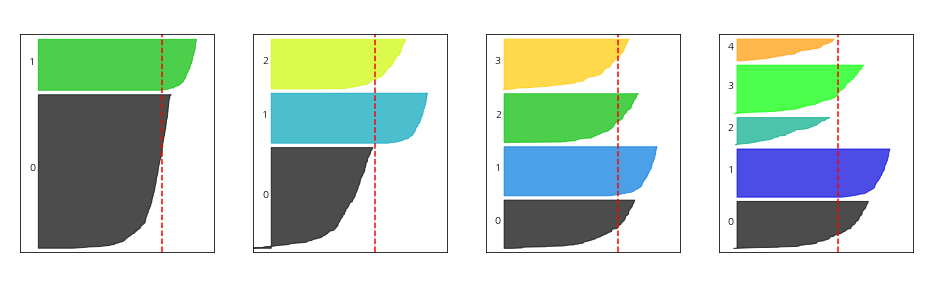

In [75]:
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성  
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)  

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([ 2, 3, 4, 5], X)

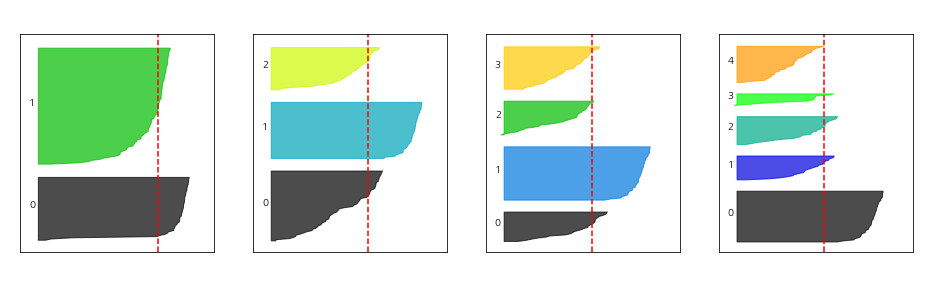

In [76]:
from sklearn.datasets import load_iris

iris=load_iris()
visualize_silhouette([ 2, 3, 4,5 ], iris.data)

# 평균 이동

In [77]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples = 200, n_features = 2, centers = 3, cluster_std = 0.7, random_state = 0)

meanshift = MeanShift(bandwidth = 0.8)
cluster_labels = meanshift.fit_predict(X)
print("cluster labels 유형 : ", np.unique(cluster_labels))

cluster labels 유형 :  [0 1 2 3 4 5]


In [78]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print("bandwidth 값 : ", round(bandwidth,3))

bandwidth 값 :  1.816


In [80]:
X[:5]

array([[-1.67173659,  3.5340075 ],
       [ 0.73273157,  4.41323161],
       [ 1.08473328,  4.56850109],
       [-1.45849654,  3.32594984],
       [ 1.1850368 ,  5.23225746]])

In [82]:
import pandas as pd

clusterDF = pd.DataFrame(data = X, columns = ["ftr1","ftr2"])
clusterDF["target"] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth = best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print("cluster labels 유형 : ", np.unique(cluster_labels))

cluster labels 유형 :  [0 1 2]


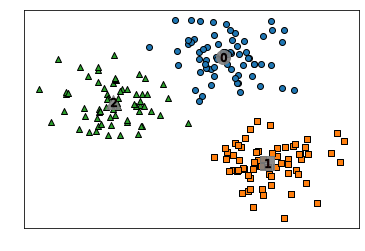

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label] )
    
    # 군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='r', edgecolor='k', marker='$%d$' % label)
    
plt.show()

In [90]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


# GMM(Gaussian Mixture Model

In [91]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [92]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)


In [95]:
gmm_cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [93]:
# 군집화 결과를 irisdf의 gmm_cluster 컬럼 명으로 저장
irisDF["gmm_cluster"] = gmm_cluster_labels
irisDF["target"] = iris.target

In [94]:
# target의 값에 따라 gmm_cluster 값이 어떻게 매핑 됐는지 확인
iris_result = irisDF.groupby(["target"])["gmm_cluster"].value_counts()

In [96]:
iris_result

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64

In [98]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kmeans_cluster, dtype: int64


In [99]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

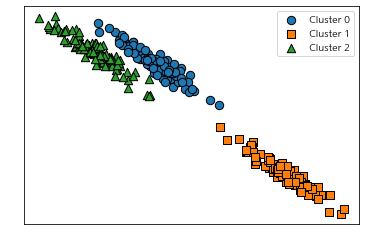

In [100]:
from sklearn.datasets import make_blobs

# make_blobs() 로 300개의 데이터 셋, 3개의 cluster 셋, cluster_std=0.5 을 만듬. 
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터 셋을 생성하기 위해 변환함. 
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
# feature 데이터 셋과 make_blobs( ) 의 y 결과 값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
# 생성된 데이터 셋을 target 별로 다른 marker 로 표시하여 시각화 함. 
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

In [109]:
X_aniso[:5]

array([[-1.6718278 ,  3.81428351],
       [ 0.94538457, -0.90194387],
       [-0.95919906,  2.85715216],
       [-2.18779941,  3.56990345],
       [-1.96710012,  3.06752789]])

In [110]:
clusterDF

,ftr1,ftr2,target
0,-1.671828,3.814284,0
1,0.945385,-0.901944,1
2,-0.959199,2.857152,0
3,-2.187799,3.569903,2
4,-1.967100,3.067528,2
...,...,...,...
295,-1.613222,3.470631,0
296,-2.052630,3.662770,2
297,0.922261,-0.841803,1
298,-1.223389,2.932352,0


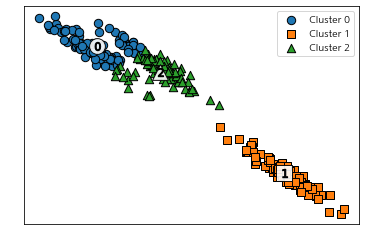

In [111]:
# 3개의 Cluster 기반 Kmeans 를 X_aniso 데이터 셋에 적용 
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label',iscenter=True)

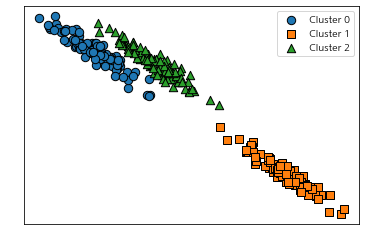

In [112]:
# 3개의 n_components기반 GMM을 X_aniso 데이터 셋에 적용 
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정. 
visualize_cluster_plot(gmm, clusterDF, 'gmm_label',iscenter=False)

In [113]:
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


# DBSCAN

In [114]:
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [116]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.6, min_samples = 8, metric = "euclidean")
dbscan_labels = dbscan.fit_predict(iris.data)



irisDF["dbscan_cluster"] = dbscan_labels
irisDF["target"] = iris.target

iris_result = irisDF.groupby(["target"])["dbscan_cluster"].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


In [118]:
irisDF

,sepal_length,sepal_width,petal_length,petal_width,target,dbscan_cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,1
148,6.2,3.4,5.4,2.3,2,1


In [149]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False
    plt.figure(figsize = (15,8))
    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
            
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    
    plt.legend(loc=legend_loc, fontsize = 15)
    plt.show()

In [125]:
from sklearn.decomposition import PCA
# 2차원으로 시각화하기 위해 PCA n_componets=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
#visualize_cluster_2d() 함수는 ftr1, ftr2 컬럼을 좌표에 표현하므로 PCA 변환값을 해당 컬럼으로 생성
irisDF["ftr1"] = pca_transformed[:,0]
irisDF["ftr2"] = pca_transformed[:,1]

In [126]:
pca_transformed[:5]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

In [127]:
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target,dbscan_cluster,ftr1,ftr2
0,5.1,3.5,1.4,0.2,0,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,0,-2.728717,0.326755


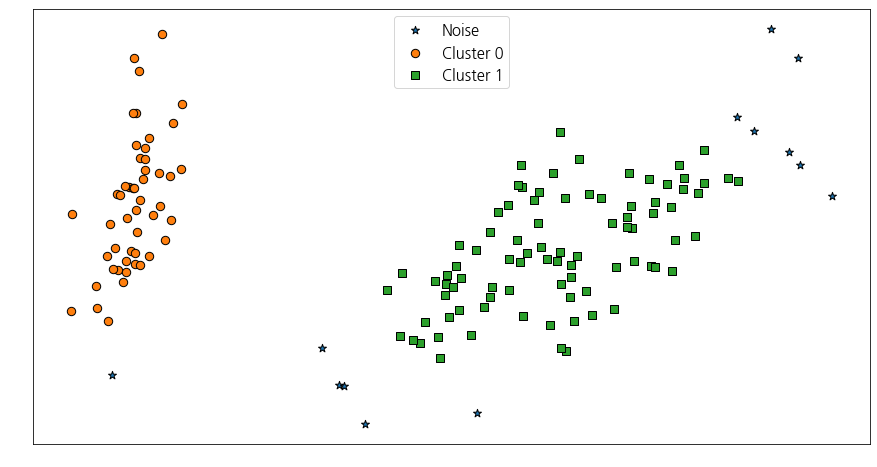

In [151]:
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


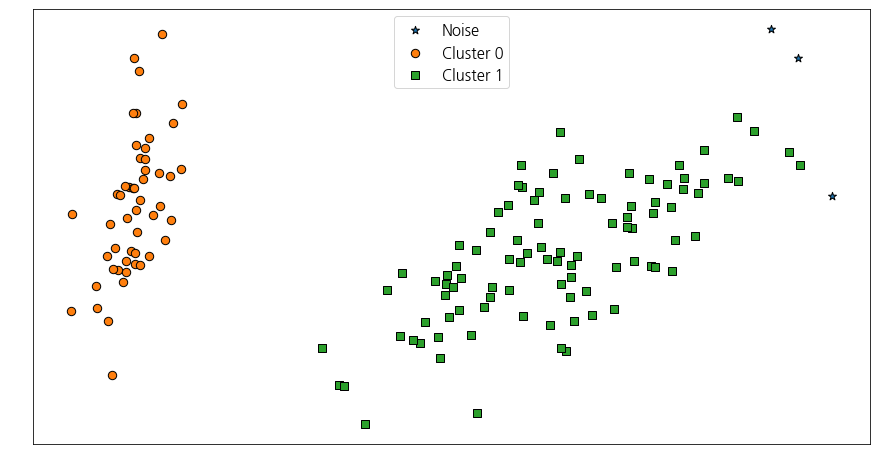

In [153]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


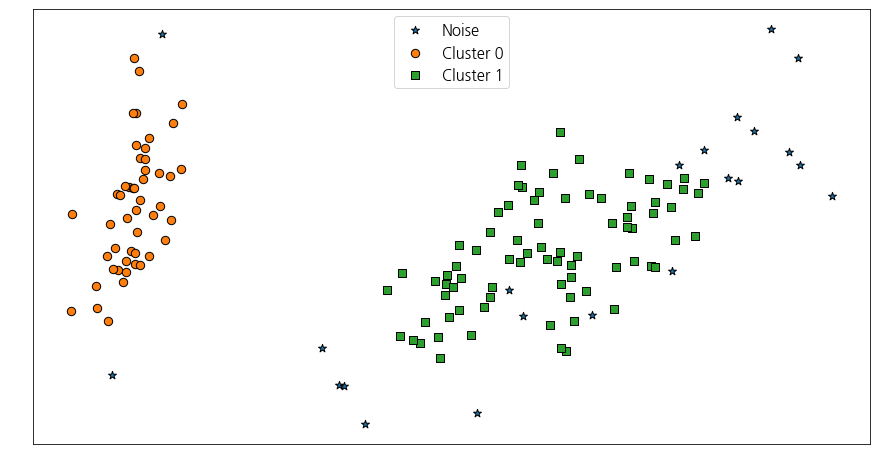

In [154]:
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

In [157]:
irisDF["dbscan_cluster"].value_counts()

 1    80
 0    48
-1    22
Name: dbscan_cluster, dtype: int64

# DBSCAN 적용하기 - make_circles() 데이터 세트

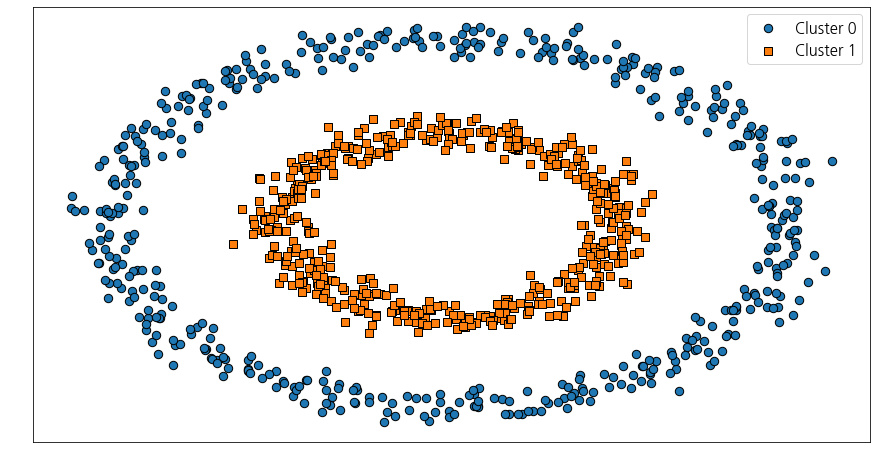

In [158]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

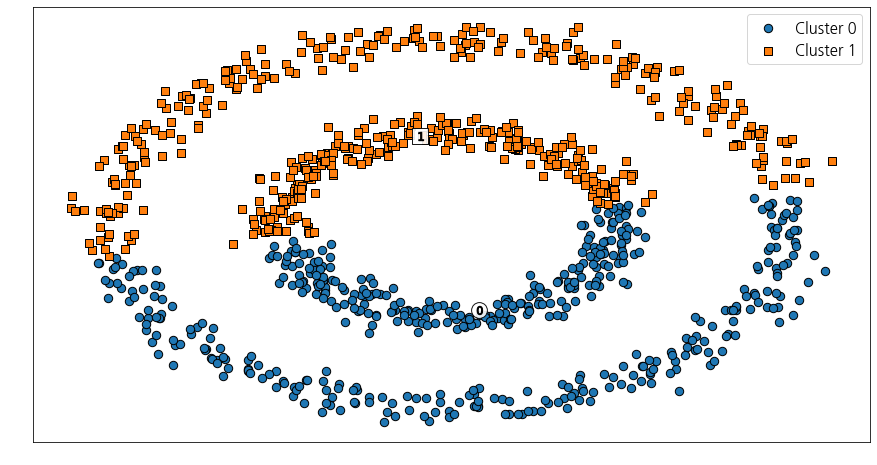

In [161]:
# KMeans로 make_circles() 데이터 세트를 군집화 수행
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, max_iter = 1000, random_state = 0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF["kmeans_cluster"] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, "kmeans_cluster", iscenter = True)

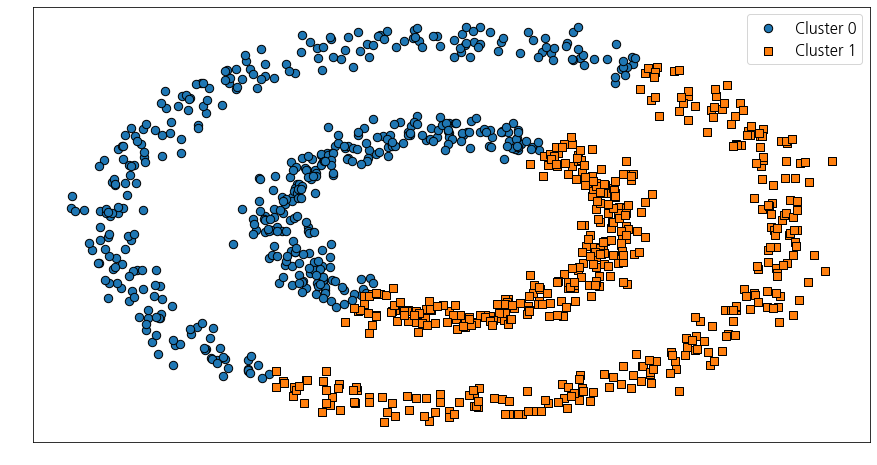

In [162]:
# GMM으로 makecircles( ) 데이터 세트를 군집화 수행

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state = 0)
gmm_label = gmm.fit(X).predict(X)
clusterDF["gmm_cluster"] = gmm_label

visualize_cluster_plot(gmm, clusterDF, "gmm_cluster", iscenter = False)


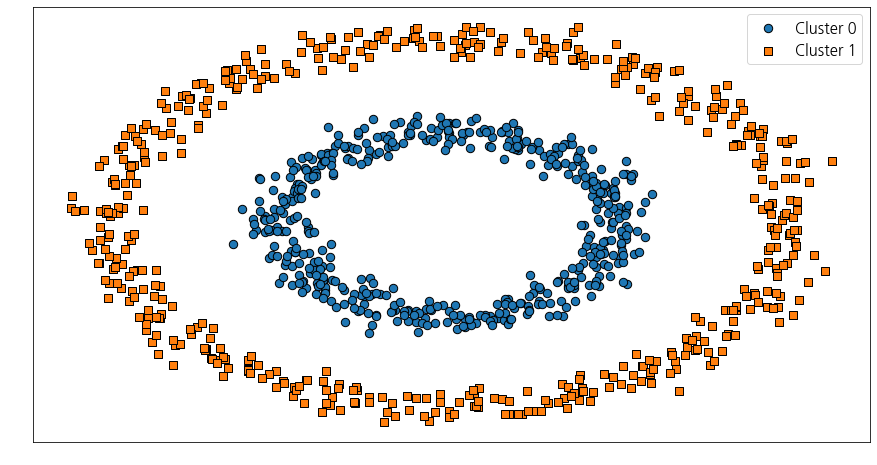

In [163]:
# DBSCAN으로 makecircles( ) 데이터 세트를 군집화 수행

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.2, min_samples = 10, metric="euclidean")
dbscan_labels = dbscan.fit_predict(X)
clusterDF["dbscan_cluster"] = dbscan_labels
visualize_cluster_plot(dbscan, clusterDF, "dbscan_cluster", iscenter = False)


# 군집화 실습 - 고객 세그먼테이션

In [166]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

retail_df = pd.read_excel(io='Online Retail.xlsx')
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [167]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [168]:
retail_df = retail_df[retail_df["Quantity"] > 0]
retail_df = retail_df[retail_df["UnitPrice"] > 0]
retail_df = retail_df[retail_df["CustomerID"].notnull()]
print(retail_df.shape)
retail_df.isnull().sum()

(397884, 8)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [169]:
retail_df["Country"].value_counts()[:5]

United Kingdom    354321
Germany             9040
France              8341
EIRE                7236
Spain               2484
Name: Country, dtype: int64

In [170]:
retail_df = retail_df[retail_df["Country"] == "United Kingdom"]
print(retail_df.shape)

(354321, 8)


In [171]:
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [172]:
retail_df["sale_amount"] = retail_df["Quantity"] * retail_df["UnitPrice"]
retail_df["CustomerID"] = retail_df["CustomerID"].astype(int)

In [173]:
retail_df["CustomerID"].value_counts().head(5)

17841    7847
14096    5111
12748    4595
14606    2700
15311    2379
Name: CustomerID, dtype: int64

In [174]:
retail_df.groupby(["CustomerID"])["sale_amount"].sum().sort_values(ascending = False)[:5]

CustomerID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
Name: sale_amount, dtype: float64

In [175]:
retail_df.groupby(["InvoiceNo", "StockCode"])["InvoiceNo"].count().mean()

1.028702077315023

In [176]:
retail_df.groupby(["InvoiceNo", "StockCode"])["InvoiceNo"].count()

InvoiceNo  StockCode
536365     21730        1
           22752        1
           71053        1
           84029E       1
           84029G       1
                       ..
581585     84946        1
581586     20685        1
           21217        1
           22061        1
           23275        1
Name: InvoiceNo, Length: 344435, dtype: int64

In [179]:
# DataFrame의 groupby() 의 multiple 연산을 위해 agg() 이용
# Recency는 InvoiceDate 컬럼의 max() 에서 데이터 가공
# Frequency는 InvoiceNo 컬럼의 count() , Monetary value는 sale_amount 컬럼의 sum()
aggregations = {
    'InvoiceDate': 'max',
    'InvoiceNo': 'count',
    'sale_amount':'sum'
}
cust_df = retail_df.groupby('CustomerID').agg(aggregations)
# groupby된 결과 컬럼값을 Recency, Frequency, Monetary로 변경
cust_df = cust_df.rename(columns = {'InvoiceDate':'Recency',
                                    'InvoiceNo':'Frequency',
                                    'sale_amount':'Monetary'
                                   }
                        )
cust_df = cust_df.reset_index()
cust_df.head(3)

,CustomerID,Recency,Frequency,Monetary
0,12346,2011-01-18 10:01:00,1,77183.60
1,12747,2011-12-07 14:34:00,103,4196.01
2,12748,2011-12-09 12:20:00,4595,33719.73


In [180]:
import datetime as dt

cust_df["Recency"] = dt.datetime(2011,12,10) - cust_df["Recency"]
cust_df["Recency"] = cust_df["Recency"].apply(lambda x : x.days + 1)
print("cust_df 로우와 컬럼 건수는 : ", cust_df.shape)
cust_df.head(3)

cust_df 로우와 컬럼 건수는 :  (3920, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4595,33719.73


# RMF 기반 고객 세그먼테이션

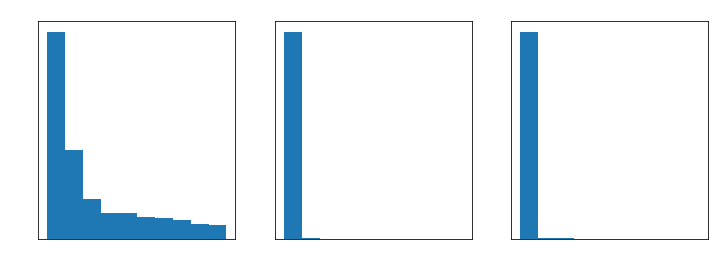

In [183]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize = (12,4), nrows = 1, ncols = 3)
ax1.set_title("Recency Histogram")
ax1.hist(cust_df["Recency"])

ax2.set_title("Recency Histogram")
ax2.hist(cust_df['Frequency'])

ax3.set_title("Monetary Histogram")
ax3.hist(cust_df["Monetary"])

plt.show()

In [184]:
cust_df[["Recency", "Frequency","Monetary"]].describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,92.742092,90.388010,1864.385601
std,99.533485,217.808385,7482.817477
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,300.280000
50%,51.000000,41.000000,652.280000
75%,143.000000,99.250000,1576.585000
max,374.000000,7847.000000,259657.300000


In [185]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

X_features = cust_df[['Recency','Frequency','Monetary']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))


실루엣 스코어는 : 0.592


In [186]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성  
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [187]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

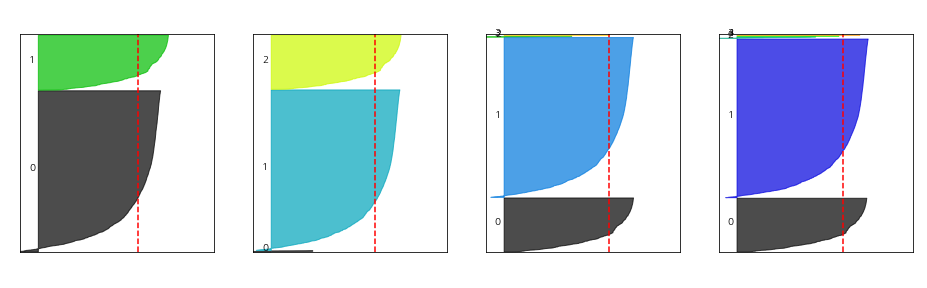

In [188]:
visualize_silhouette([2,3,4,5],X_features_scaled)

C:\Users\qkfkd\AppData\Local\Temp/ipykernel_51156/3935396419.py:36: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
C:\Users\qkfkd\AppData\Local\Temp/ipykernel_51156/3935396419.py:36: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\


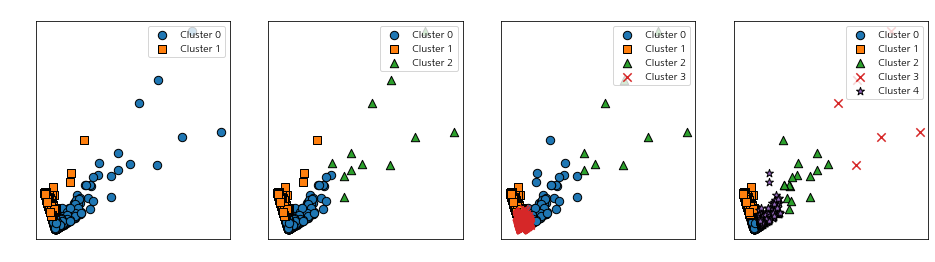

In [189]:
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

In [ ]:
### Log 변환을 통해 데이터 변환
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples



In [ ]:
# Recency, Frequecny, Monetary 컬럼에 np.log1p() 로 Log Transformation
cust_df['Recency_log'] = np.log1p(cust_df['Recency'])
cust_df['Frequency_log'] = np.log1p(cust_df['Frequency'])
cust_df['Monetary_log'] = np.log1p(cust_df['Monetary'])


# Log Transformation 데이터에 StandardScaler 적용
X_features = cust_df[['Recency_log','Frequency_log','Monetary_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)